In [1]:
import os, pickle
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
shuffle = True
random_state = True

In [2]:
input_ = {
    "model_id": "20231026000000",
    "start_time": "2023-09-01 00:00:00",
    "end_time": "2023-10-10 00:00:00",
    "model_type": 0
}

root = os.getcwd()
model_id = input_["model_id"]
model_path = os.path.join(root, "data", "train", model_id, "ng4_5")
os.makedirs(model_path, exist_ok = True)
        
model_detail = os.path.join(model_path, "model")
os.makedirs(model_detail, exist_ok = True)

In [3]:
df = pd.read_excel("data/train/train.xlsx", sheet_name = "simulation", header = [0, 1, 2, 3])
print(f"length: {len(df)}")
print(f"columns: {df.shape[1]}")
df.head(3)

length: 1208
columns: 91


Unnamed: 0_level_0              A0                              \
    Unnamed: 0_level_1              左邊                               
    Unnamed: 0_level_2 直徑(1)\n圓(A0.左邊)                               
           update_time              NV      AV     DV     UT LT ER   
0  2023-09-20 17:53:00              98  98.019  0.019  0.022  0  0   
1  2023-09-20 19:32:00              98  98.015  0.015  0.022  0  0   
2  2023-09-21 11:18:00              98  98.012  0.012  0.022  0  0   

                                     ...                         A180         \
                                     ...                          左右邊          
  Y距離(7)\n距離(A0.左邊)                  ... Y距離(6)\n距離(A180.左邊)(A180.右邊)          
                 NV       AV     DV  ...                           DV     UT   
0               100  100.011  0.011  ...                        0.008  0.019   
1               100  100.000  0.000  ...                        0.011  0.019   
2               100   99.997 -0.003  ...                       -0.008  0.019   

                   None                                     
                   None                                     
            XY距離(1)\n距離                                     
  LT     ER          NV       AV     DV    UT    LT     ER  
0  0  0.000       240.3  240.301  0.001  0.05 -0.05  0.000  
1  0  0.000       240.3  240.321  0.021  0.05 -0.05  0.000  
2  0 -0.008       240.3  240.242 -0.058  0.05 -0.05 -0.008  

[3 rows x 91 columns]

In [4]:
# find ER samples
ER_col = [i for i in df.columns if i[3] == "ER"]
df = df[(df[ER_col] != 0).any(axis = 1)].reset_index(drop = True)
df

Unnamed: 0_level_0              A0                              \
      Unnamed: 0_level_1              左邊                               
      Unnamed: 0_level_2 直徑(1)\n圓(A0.左邊)                               
             update_time              NV      AV     DV     UT LT ER   
0    2023-09-20 17:53:00              98  98.019  0.019  0.022  0  0   
1    2023-09-21 11:18:00              98  98.012  0.012  0.022  0  0   
2    2023-09-21 14:16:00              98  98.011  0.011  0.022  0  0   
3    2023-09-21 17:36:00              98  98.013  0.013  0.022  0  0   
4    2023-09-21 17:40:00              98  98.009  0.009  0.022  0  0   
..                   ...             ...     ...    ...    ... .. ..   
395  2023-10-06 23:46:00              98  98.002  0.002  0.022  0  0   
396  2023-11-02 16:06:09              98  98.012  0.012  0.022  0  0   
397  2023-11-02 16:06:09               0   0.000  0.000  0.000  0  0   
398  2023-11-02 16:18:57              98  98.012  0.012  0.022  0  0   
399  2023-11-02 16:18:57               0   0.000  0.000  0.000  0  0   

                                       ...                         A180  \
                                       ...                          左右邊   
    Y距離(7)\n距離(A0.左邊)                  ... Y距離(6)\n距離(A180.左邊)(A180.右邊)   
                   NV       AV     DV  ...                           DV   
0                 100  100.011  0.011  ...                        0.008   
1                 100   99.997 -0.003  ...                       -0.008   
2                 100  100.008  0.008  ...                        0.010   
3                 100  100.012  0.012  ...                        0.007   
4                 100  100.010  0.010  ...                        0.006   
..                ...      ...    ...  ...                          ...   
395               100  100.002  0.002  ...                       -0.002   
396               100   99.997 -0.003  ...                        0.007   
397                 0    0.000  0.000  ...                        0.000   
398               100   99.997 -0.003  ...                        0.007   
399                 0    0.000  0.000  ...                        0.000   

                            None                                     
                            None                                     
                     XY距離(1)\n距離                                     
        UT LT     ER          NV       AV     DV    UT    LT     ER  
0    0.019  0  0.000       240.3  240.301  0.001  0.05 -0.05  0.000  
1    0.019  0 -0.008       240.3  240.242 -0.058  0.05 -0.05 -0.008  
2    0.019  0  0.000       240.3  240.197 -0.103  0.05 -0.05 -0.053  
3    0.019  0  0.000       240.3  240.203 -0.097  0.05 -0.05 -0.047  
4    0.019  0  0.000       240.3  240.322  0.022  0.05 -0.05  0.000  
..     ... ..    ...         ...      ...    ...   ...   ...    ...  
395  0.019  0 -0.002       240.3  240.276 -0.024  0.05 -0.05  0.000  
396  0.019  0  0.000       240.3  240.351  0.051  0.05 -0.05  0.001  
397  0.000  0  0.000       240.3  240.351  0.051  0.05 -0.05  0.001  
398  0.019  0  0.000       240.3  240.351  0.051  0.05 -0.05  0.001  
399  0.000  0  0.000       240.3  240.351  0.051  0.05 -0.05  0.001  

[400 rows x 91 columns]

In [5]:
# calculate total ER by each side
left_ER_col  = [i for i in df.columns if (i[3] == "ER") and (i[1] == "左邊")]
right_ER_col = [i for i in df.columns if (i[3] == "ER") and (i[1] == "右邊")]
df["left"]  = df[left_ER_col].sum(axis = 1)
df["right"] = df[right_ER_col].sum(axis = 1)

In [6]:
# calculate difference between left and right
error = abs(df["left"] - df["right"])
error.value_counts(normalize = True)

0.000    0.5250
0.001    0.2125
0.002    0.1625
0.004    0.0425
0.003    0.0425
0.005    0.0100
0.006    0.0050
Name: proportion, dtype: float64

In [7]:
# get sample which can be adjusted
non_index = df[error > 0.001].index # set a threshold (~70%)
df = df.drop(non_index).reset_index(drop = True)

In [8]:
# generate target
df["target"] = (df["left"] >= df["right"]).astype(int)
df["target"].value_counts()

target
1    249
0     46
Name: count, dtype: int64

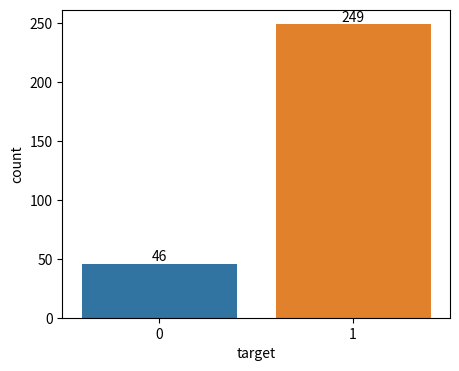

In [9]:
plt.figure(figsize = (5, 4))
fig = sns.countplot(data = df, x = "target")
for p in fig.patches:
    fig.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

In [10]:
# remove constant value
drop_flag = (df.nunique() == 1)
keep_cols = df.columns[~drop_flag]
df = df[keep_cols].iloc[:, 1:].drop(["left", "right"], axis = 1)
df.head(3)

A0                                                          \
               左邊                                                           
  直徑(1)\n圓(A0.左邊)                       Y距離(7)\n距離(A0.左邊)                   
               NV      AV     DV     UT                NV       AV     DV   
0              98  98.019  0.019  0.022               100  100.011  0.011   
1              98  98.013  0.013  0.022               100  100.012  0.012   
2              98  98.015  0.015  0.022               100  100.011  0.011   

                      ...                 A180                               \
                      ...                   右邊                          左右邊   
                      ... Z距離(10)\n距離(A180.右邊) Y距離(6)\n距離(A180.左邊)(A180.右邊)   
     UT    LT     ER  ...                   DV                           NV   
0  0.01 -0.01  0.001  ...               -0.001                           66   
1  0.01 -0.01  0.002  ...               -0.001                           66   
2  0.01 -0.01  0.001  ...                0.009                           66   

                                    None               target  
                                    None                       
                             XY距離(1)\n距離                       
       AV     DV     UT   ER          AV     DV     ER         
0  66.008  0.008  0.019  0.0     240.301  0.001  0.000      1  
1  66.007  0.007  0.019  0.0     240.203 -0.097 -0.047      1  
2  66.016  0.016  0.019  0.0     240.335  0.035  0.000      1  

[3 rows x 69 columns]

In [11]:
# rename columns
df.columns = [(cols[2] + "_" + cols[3]) if cols[0] != "target" else cols[0] for cols in df.columns]
df.head(3)

,直徑(1)\n圓(A0.左邊)_NV,直徑(1)\n圓(A0.左邊)_AV,直徑(1)\n圓(A0.左邊)_DV,直徑(1)\n圓(A0.左邊)_UT,Y距離(7)\n距離(A0.左邊)_NV,Y距離(7)\n距離(A0.左邊)_AV,Y距離(7)\n距離(A0.左邊)_DV,Y距離(7)\n距離(A0.左邊)_UT,Y距離(7)\n距離(A0.左邊)_LT,Y距離(7)\n距離(A0.左邊)_ER,...,Z距離(10)\n距離(A180.右邊)_DV,Y距離(6)\n距離(A180.左邊)(A180.右邊)_NV,Y距離(6)\n距離(A180.左邊)(A180.右邊)_AV,Y距離(6)\n距離(A180.左邊)(A180.右邊)_DV,Y距離(6)\n距離(A180.左邊)(A180.右邊)_UT,Y距離(6)\n距離(A180.左邊)(A180.右邊)_ER,XY距離(1)\n距離_AV,XY距離(1)\n距離_DV,XY距離(1)\n距離_ER,target
0,98,98.019,0.019,0.022,100,100.011,0.011,0.01,-0.01,0.001,...,-0.001,66,66.008,0.008,0.019,0.0,240.301,0.001,0.000,1
1,98,98.013,0.013,0.022,100,100.012,0.012,0.01,-0.01,0.002,...,-0.001,66,66.007,0.007,0.019,0.0,240.203,-0.097,-0.047,1
2,98,98.015,0.015,0.022,100,100.011,0.011,0.01,-0.01,0.001,...,0.009,66,66.016,0.016,0.019,0.0,240.335,0.035,0.000,1


In [12]:
# split data
X = df.drop("target", axis = 1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, stratify = y, shuffle = shuffle)

In [13]:
# train model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [14]:
# save model
pickle.dump(model, open(os.path.join(model_detail, f"model.pkl"),  "wb"))
pickle.dump(X_train.columns, open(os.path.join(model_detail, f"features.pkl"),  "wb"))

In [15]:
# evaluate cross validation score
cv_scores = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'f1')
cv_score = (cv_scores.mean())
cv_score

0.9408456500950236

In [16]:
# calculate score
f1_train = f1_score(y_train, y_train_pred, average = 'macro')
f1_test = f1_score(y_test, y_test_pred, average = 'macro')
score = pd.DataFrame([[f1_train, f1_test, cv_score]], columns = ["train", "test", "cv"]).round(4)
score.to_csv(f"{model_path}/f1_score.csv", index = False)
score

,train,test,cv
0,1.0,0.8282,0.9408


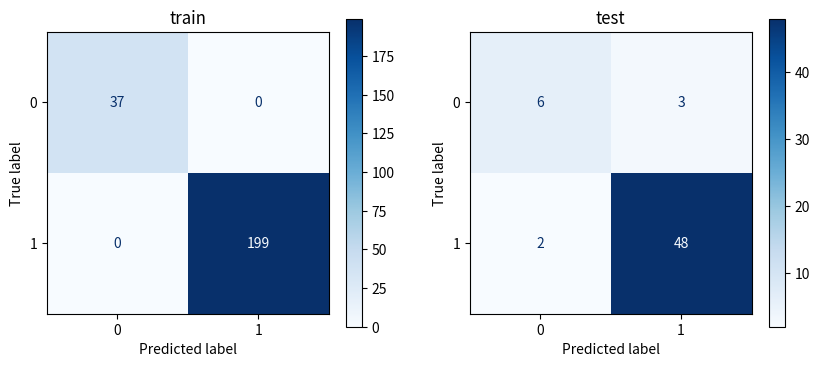

-------------------------train-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       199

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236

--------------------------test-------------------------
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.94      0.96      0.95        50

    accuracy                           0.92        59
   macro avg       0.85      0.81      0.83        59
weighted avg       0.91      0.92      0.91        59



In [17]:
# evaluate performance
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_train_pred))#, display_labels = (set(y_train) | set(pred_trains[f"{name}_train"])))
disp.plot(cmap = plt.cm.Blues, ax = ax[0])
ax[0].set_title("train")

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_test_pred))#, display_labels = (set(y_test) | set(pred_tests[f"{name}_test"])))
disp.plot(cmap = plt.cm.Blues, ax = ax[1])
ax[1].set_title("test")

plt.show()
fig.savefig(f"{model_path}/confusion_matrix.png")

    
print(f"train".center(55, '-'))
print(classification_report(y_train, y_train_pred))
print(f"test".center(55, '-'))
print(classification_report(y_test, y_test_pred))

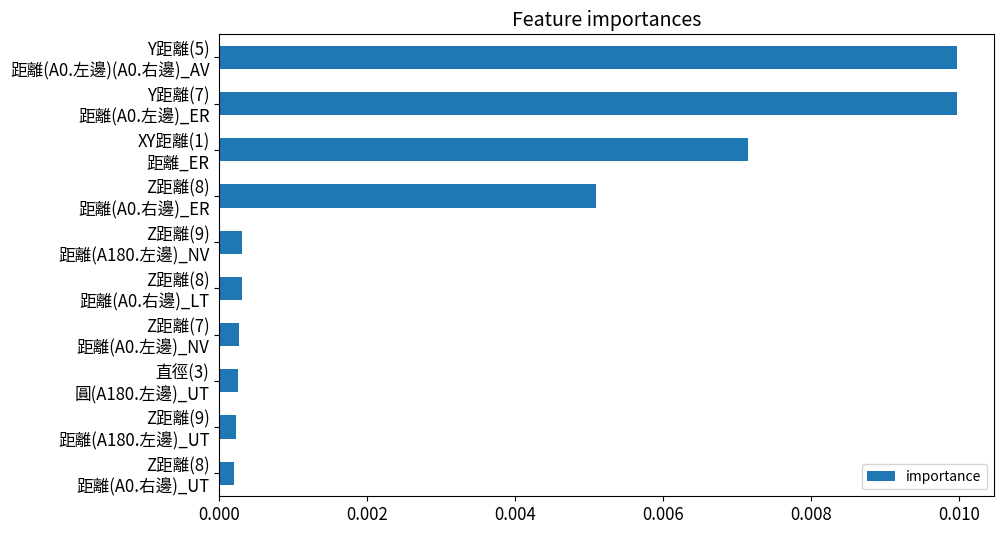

In [18]:
# feature importance
fig, ax = plt.subplots(figsize = (10, 6))
imp = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ["importance"])
imp = imp.query("importance != 0").sort_values("importance").head(10)
imp.plot(kind = "barh", ax = ax, fontsize = 12)
ax.set_title("Feature importances", fontsize = 14)
plt.show()